<B><U>Survival Data Analysis Using the Breast Cancer Wisconsin
(Prognostic) Data Set</U></B>

In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter
from lifelines import NelsonAalenFitter
from lifelines import CoxPHFitter
from sklearn.model_selection import train_test_split
from lifelines.utils import concordance_index


In [22]:
# To load Cancer's dataset directly from the web-url run this
# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wpbc.data'
# column_names = [
#     'ID', 'Outcome', 'Time', 'radius_mean', 'texture_mean', 'perimeter_mean', 
#     'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 
#     'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 
#     'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 
#     'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 
#     'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 
#     'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 
#     'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst', 
#     'Tumor_Size', 'Lymph_Node_Status'
# ]
# # Load the dataset
# data = pd.read_csv(url, header=None, names=column_names)
data = pd.read_csv('data.csv')
data=data.drop(columns='Unnamed: 0')

display(data)

,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Tumor_Size,Lymph_Node_Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,943471,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,94547,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,947204,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?


<B>Data Exploration and Preprocessing</B>

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       198 non-null    int64  
 1   Outcome                  198 non-null    object 
 2   Time                     198 non-null    int64  
 3   radius_mean              198 non-null    float64
 4   texture_mean             198 non-null    float64
 5   perimeter_mean           198 non-null    float64
 6   area_mean                198 non-null    float64
 7   smoothness_mean          198 non-null    float64
 8   compactness_mean         198 non-null    float64
 9   concavity_mean           198 non-null    float64
 10  concave_points_mean      198 non-null    float64
 11  symmetry_mean            198 non-null    float64
 12  fractal_dimension_mean   198 non-null    float64
 13  radius_se                198 non-null    float64
 14  texture_se               1

In [24]:
data.isnull().sum()

ID                         0
Outcome                    0
Time                       0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Tumor_Size                 0
Lymph_Node_Sta

In [44]:
# upon inspection some data in lymph node status contains '?' character 
data = data[data['Lymph_Node_Status'] != '?']
data.shape

(194, 34)

In [26]:

data.drop(labels='ID',axis=1).describe().round(4).T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
Time,46.9381,34.5236,1.0000,14.2500,39.5000,73.0000,125.0000
radius_mean,17.4023,3.1717,10.9500,15.0525,17.2900,19.5800,27.2200
texture_mean,22.3010,4.3353,10.3800,19.3425,21.7950,24.7825,39.2800
perimeter_mean,114.7815,21.4307,71.9000,98.1600,113.7000,129.6500,182.1000
area_mean,969.0923,353.1600,361.6000,702.5250,929.1000,1193.5000,2250.0000
smoothness_mean,0.1028,0.0126,0.0750,0.0939,0.1022,0.1114,0.1447
compactness_mean,0.1426,0.0502,0.0460,0.1098,0.1318,0.1722,0.3114
concavity_mean,0.1563,0.0709,0.0240,0.1061,0.1521,0.2005,0.4268
concave_points_mean,0.0868,0.0340,0.0203,0.0638,0.0861,0.1039,0.2012
symmetry_mean,0.1929,0.0277,0.1308,0.1741,0.1894,0.2096,0.3040


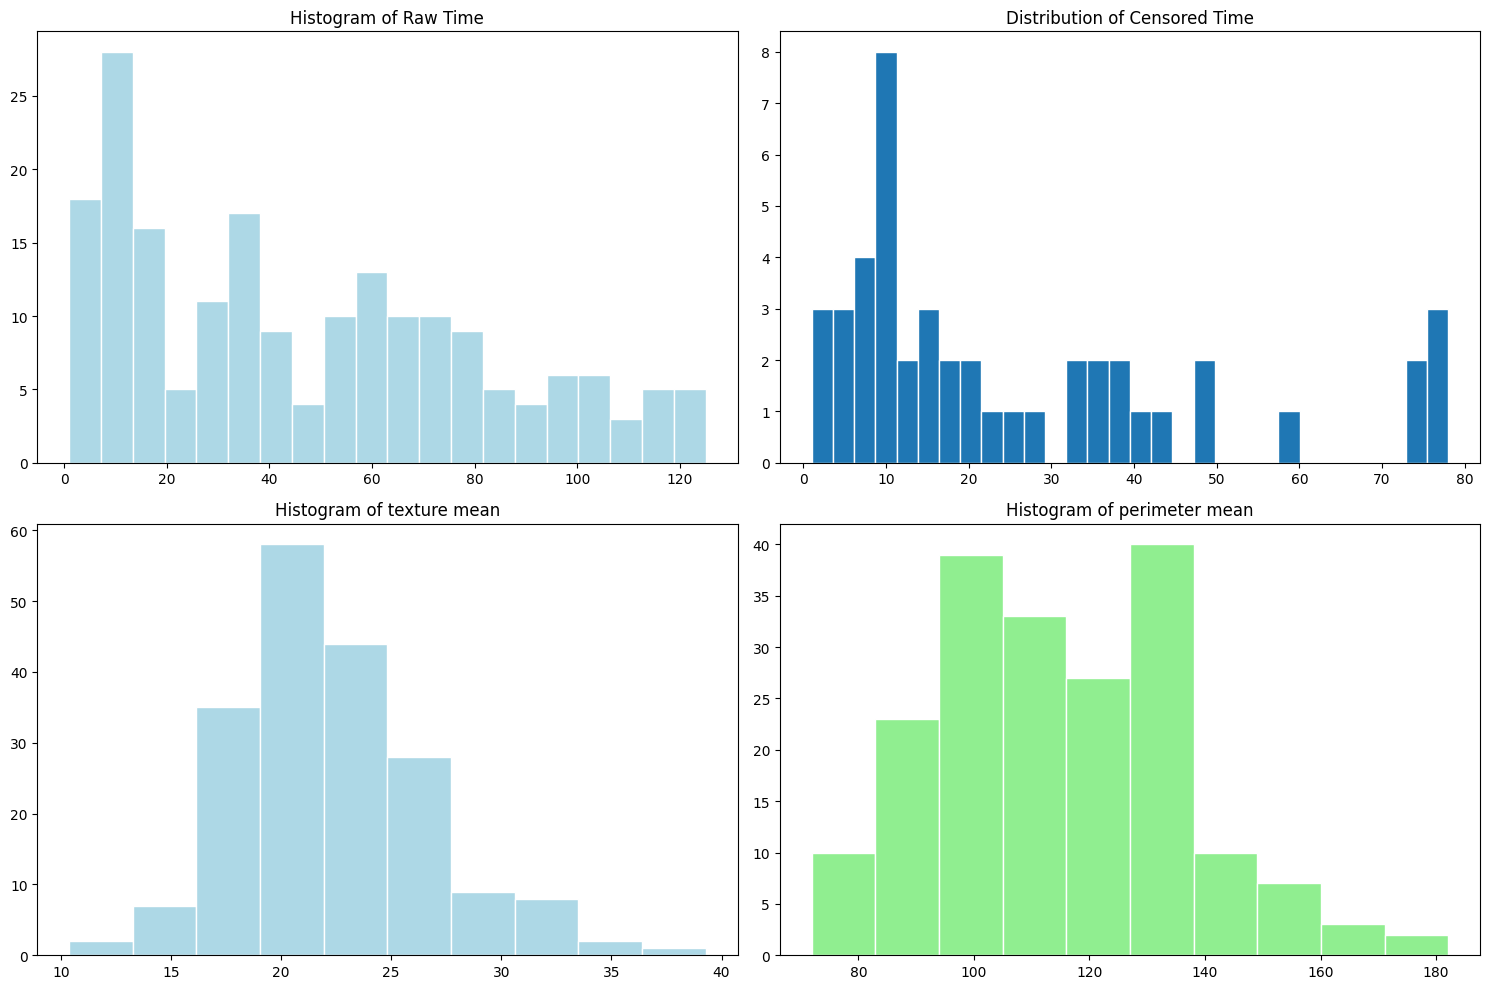

In [27]:
# histogram of Time and radius mean
data['event'] = data['Outcome'].apply(lambda x: 1 if x == 'N' else 0)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes[0,0].hist(data.Time,bins=20,color='lightblue' ,edgecolor='white')
axes[0,0].set_title('Histogram of Raw Time')

#distribution of censorship
axes[0,1].hist(data.loc[data['event'] == 0]['Time'],bins=30,edgecolor='white')
axes[0,1].set_title('Distribution of Censored Time')

# axes[0,1].hist(data.radius_mean,color='lightgreen' ,edgecolor='white')
# axes[0,1].set_title('Histogram of radius mean')

axes[1,0].hist(data.texture_mean,color='lightblue' ,edgecolor='white')
axes[1,0].set_title('Histogram of texture mean')

axes[1,1].hist(data.perimeter_mean,color='lightgreen' ,edgecolor='white')
axes[1,1].set_title('Histogram of perimeter mean')

fig.tight_layout()
plt.show()

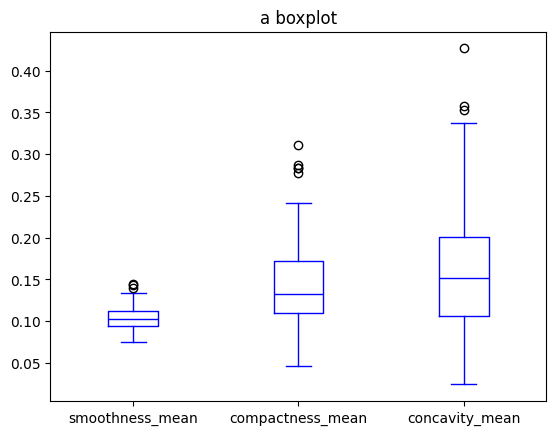

In [28]:
#boxplot of features
ax= data[['smoothness_mean','compactness_mean','concavity_mean']].plot(kind='box',title='a boxplot',color='blue')
plt.show()

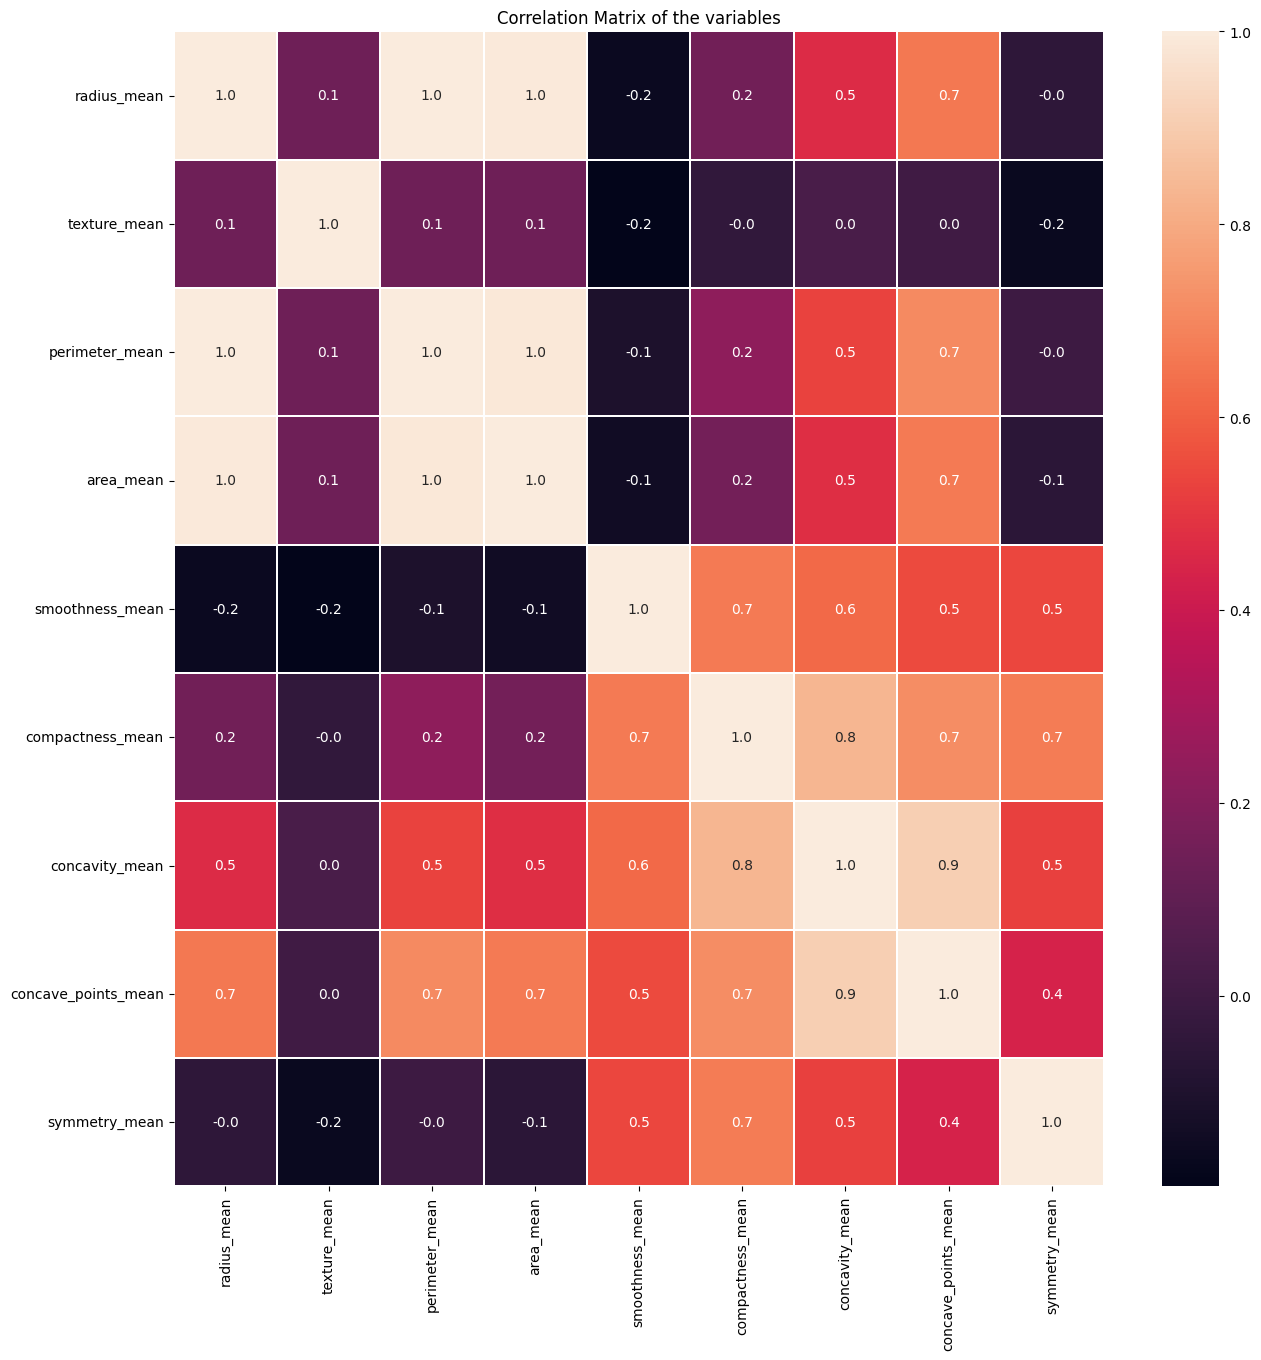

In [29]:
#correlation matrix to understand the relationship between variables
fig,ax=plt.subplots(figsize = (15,15))
# sns.heatmap(data.drop(columns=['ID','Outcome'], axis=1).corr(),annot= True,linewidths=0.3,fmt = ".1f",ax=ax)
sns.heatmap(data.drop(columns=['ID','Outcome']).iloc[:,1:10].corr(),annot= True,linewidths=0.3,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of the variables')

plt.show()

<B>NON PARAMETRIC SURVIVAL ANALYSIS<b>

In [45]:
#Kaplan Meier Curve
# before plotting the curve we have to define our event 
# creating column for the events

data['event'] = data['Outcome'].apply(lambda x: 1 if x == 'R' else 0)
data=data.drop(columns=['ID','Outcome'],axis=1)


kmf = KaplanMeierFitter()

ax = plt.subplot()

# Time of observations
X = data.Time
Y =data.event
kmf.fit(X, event_observed = Y, label = 'survival rate')
plt.title("Kaplan Meier Curve")
plt.ylabel("Survival probability estimate (KM)")
kmf.plot(ax = ax,at_risk_counts=True)
plt.xlabel("Survival Time")
plt.show()
print('Survival probability at  ',kmf.predict(24))
print('The median survival time is ', kmf.median_survival_time_)
kmf.survival_function_
# kmf.event_table



KeyError: 'Outcome'

cummulative Hazard at T=60 is 0.3026337497654783


,NA_estimate
timeline,
0.0,0.000000
1.0,0.010336
2.0,0.015599
3.0,0.015599
4.0,0.020947
...,...
116.0,0.423645
117.0,0.423645
119.0,0.423645


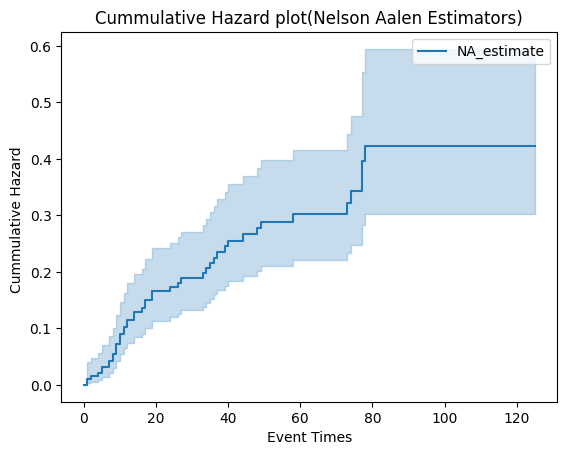

In [31]:
# Nelson aalen
naf=NelsonAalenFitter()
naf.fit(X, event_observed = Y)
naf.plot_cumulative_hazard()
plt.title('Cummulative Hazard plot(Nelson Aalen Estimators)')
plt.xlabel('Event Times')
plt.ylabel('Cummulative Hazard ')
print('cummulative Hazard at T=60 is',naf.predict(60))
naf.cumulative_hazard_

Selected feature: area_worst, C-index: 0.6977369189965098
Selected feature: Tumor_Size, C-index: 0.7257060936600579
Selected feature: Lymph_Node_Status, C-index: 0.7307811805510015
Selected features: ['area_worst', 'Tumor_Size', 'Lymph_Node_Status']


<lifelines.CoxPHFitter: fitted with 194 total observations, 148 right-censored observations>
             duration col = 'Time'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 194
number of events observed = 46
   partial log-likelihood = -211.481
         time fit was run = 2024-06-06 09:58:05 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
area_worst         0.001      1.001      0.000            0.000            0.001                1.000                1.001
Tumor_Size         0.082      1.086      0.079           -0.072            0.236                0.931                1.266
Lymph_Node_Status  0.042      1.043      0.027           -0.010            0.094                0.990                1.099

                    cmp to     z       p   -log2(p)
covariate                                          
area_worst           0.000 3.727 <0.0005     12.334
Tumor_Size           0.000 1.044   0.296      1.754
Lymph_Node_Status    0.000 1.581   0.114      3.134
---
Concordance = 0.700
Partial AIC = 428.961
log-likelihood ratio test = 19.633 on 3 df
-log2(p) of ll-ratio test = 12.272


   Bootstrapping lowess lines. May take a moment...

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 194 total observations, 148 right-censored observations>
         test_name = proportional_hazard_test

---
                        test_statistic    p  -log2(p)
Lymph_Node_Status km              0.83 0.36      1.46
                  rank            1.26 0.26      1.93
Tumor_Size        km              0.53 0.47      1.10
                  rank            0.93 0.34      1.57
area_worst        km              4.44 0.04      4.83
                  rank            4.34 0.04      4.74



1. Variable 'area_worst' failed the non-proportional test: p-value is 0.0352.

   Advice 1: the functional form of the variable 'area_worst' might be incorrect. That is, there may
be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'area_worst' using pd.cut, and then specify it in
`strata=['area_worst', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-strat

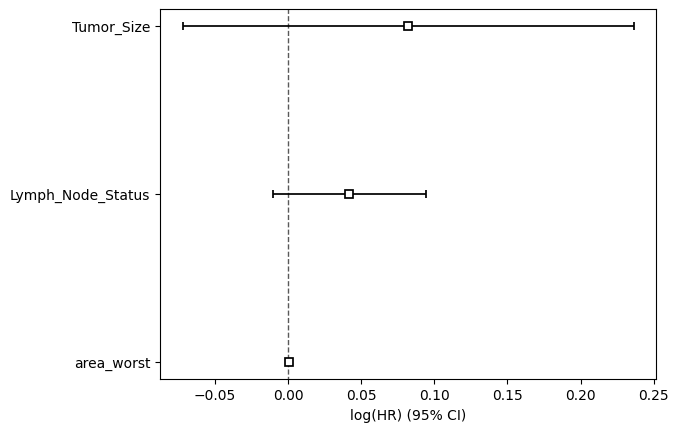

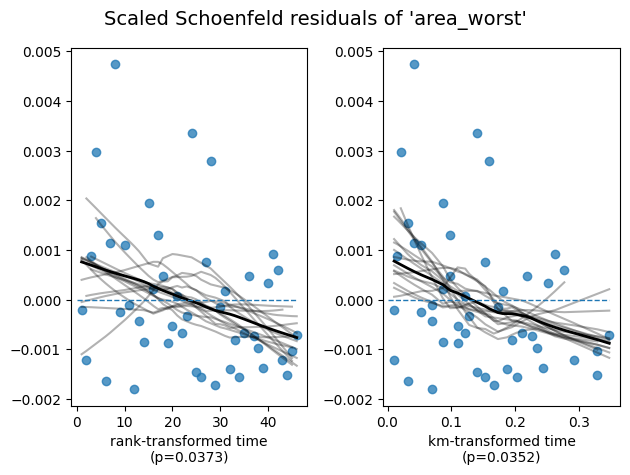

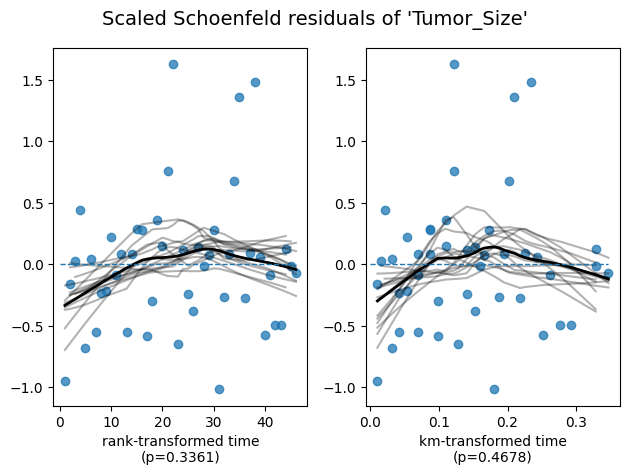

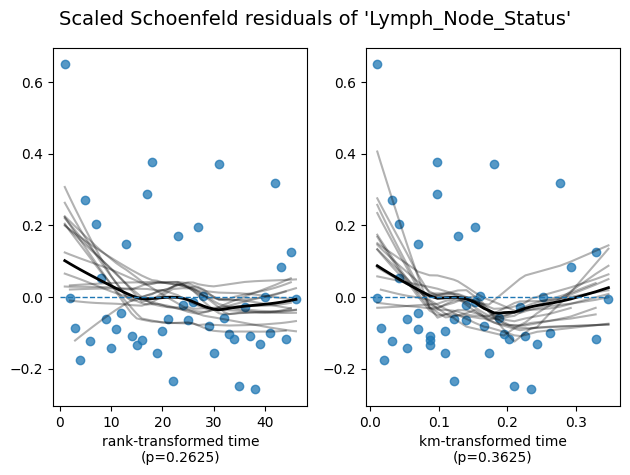

In [42]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index
from sklearn.model_selection import KFold

# we define a function to calculate the c-index using k-fold cross-validation
def calculate_cindex_cv(data, features, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    cindices = []

    for train_index, test_index in kf.split(data):
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]
        
        cph = CoxPHFitter()
        cph.fit(train_data[features + ["Time", "event"]], duration_col="Time", event_col="event")
        test_pred = cph.predict_partial_hazard(test_data[features])
        cindex = concordance_index(test_data["Time"], -test_pred, test_data["event"])
        cindices.append(cindex)

    return np.mean(cindices)

# Initializing the variables
all_features = list(data.columns)
all_features.remove("Time")
all_features.remove("event")
selected_features = []
remaining_features = all_features.copy()
best_cindex = 0

# Performing forward feature selection with cross-validation
while remaining_features:
    cindices = []
    for feature in remaining_features:
        current_features = selected_features + [feature]
        cindex = calculate_cindex_cv(data, current_features)
        cindices.append((feature, cindex))
    
    # Selecting the best feature based on c-index
    best_feature, best_feature_cindex = max(cindices, key=lambda x: x[1])
    
    # Checking for improvement
    if best_feature_cindex > best_cindex:
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        best_cindex = best_feature_cindex
        print(f"Selected feature: {best_feature}, C-index: {best_cindex}")
    else:
        # if there is no improvement in the model stop
        break

print("Selected features:", selected_features)

# fitting the final model with selected features
cph = CoxPHFitter()
cph.fit(data[selected_features + ["Time", "event"]], duration_col="Time", event_col="event")
cph.print_summary(decimals=3)
cph.plot()
cph.check_assumptions(data[selected_features + ["Time", "event"]], p_value_threshold=0.05, show_plots=True)
plt.show()


Selected feature: radius_worst, C-index: 0.7397260273972602
Selected feature: symmetry_mean, C-index: 0.7632093933463796
Selected feature: smoothness_worst, C-index: 0.7749510763209393
Selected feature: Lymph_Node_Status, C-index: 0.7808219178082192
Selected feature: fractal_dimension_mean, C-index: 0.7945205479452054
Selected feature: texture_worst, C-index: 0.8082191780821918
Selected feature: perimeter_worst, C-index: 0.8140900195694716
Selected features: ['radius_worst', 'symmetry_mean', 'smoothness_worst', 'Lymph_Node_Status', 'fractal_dimension_mean', 'texture_worst', 'perimeter_worst']


<lifelines.CoxPHFitter: fitted with 194 total observations, 148 right-censored observations>
             duration col = 'Time'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 194
number of events observed = 46
   partial log-likelihood = -205.969
         time fit was run = 2024-06-06 09:45:36 UTC

---
                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                       
radius_worst            -0.376      0.687      0.252           -0.869            0.118                0.419                1.125
symmetry_mean           -8.653      0.000      7.982          -24.298            6.991                0.000             1087.267
smoothness_worst        23.043  1.017e+10     10.061            3.325           42.761               27.787            3.725e+18
Lymph_Node_Status        0.063      1.065      0.021            0.021            0.105                1.021                1.110
fractal_dimension_mean -81.269      0.000     43.175         -165.889            3.352                0.000               28.554
texture_worst           -0.040      0.961      0.027           -0.092            0.012                0.912                1.012
perimeter_worst          0.074      1.077      0.037            0.001            0.147                1.001                1.159

                         cmp to      z     p   -log2(p)
covariate                                              
radius_worst              0.000 -1.493 0.135      2.885
symmetry_mean             0.000 -1.084 0.278      1.845
smoothness_worst          0.000  2.290 0.022      5.507
Lymph_Node_Status         0.000  2.944 0.003      8.272
fractal_dimension_mean    0.000 -1.882 0.060      4.064
texture_worst             0.000 -1.504 0.132      2.916
perimeter_worst           0.000  1.994 0.046      4.439
---
Concordance = 0.721
Partial AIC = 425.937
log-likelihood ratio test = 30.657 on 7 df
-log2(p) of ll-ratio test = 13.763


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

Proportional hazard assumption looks okay.


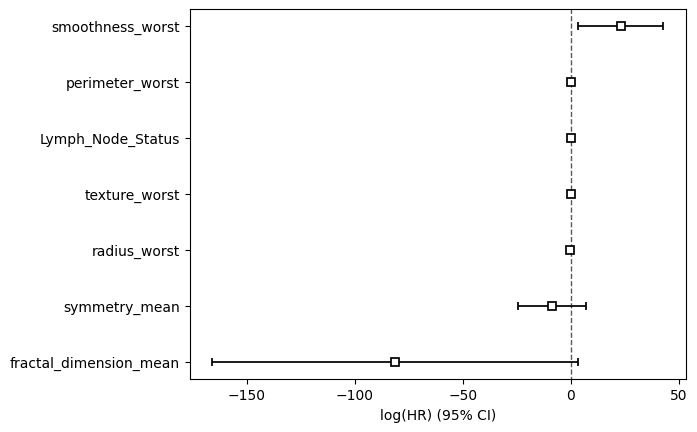

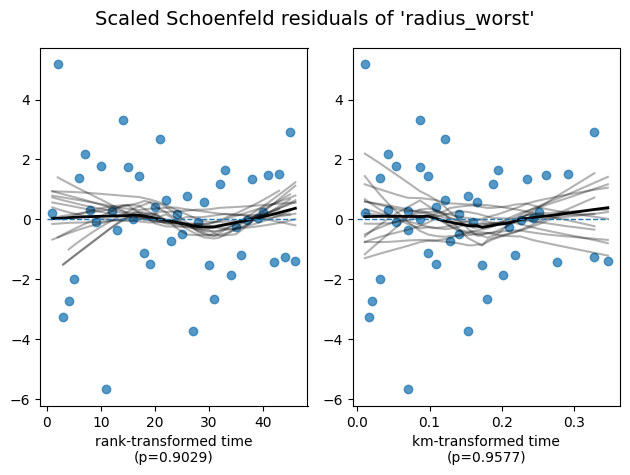

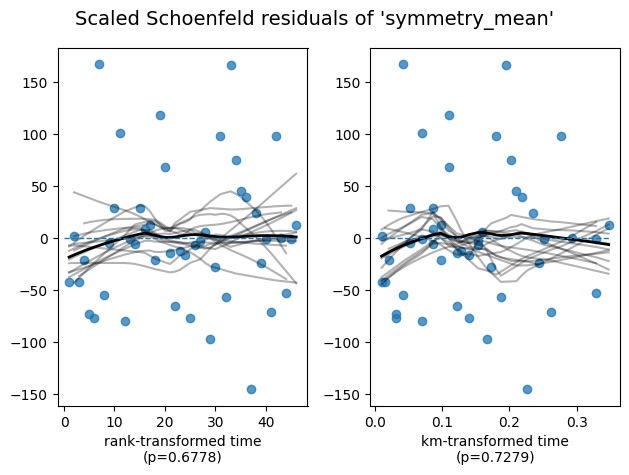

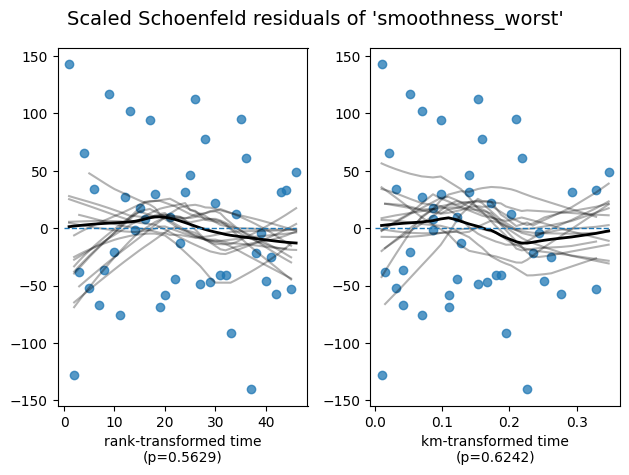

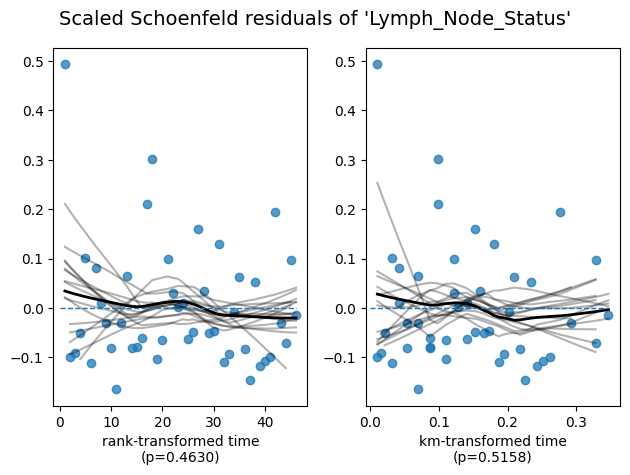

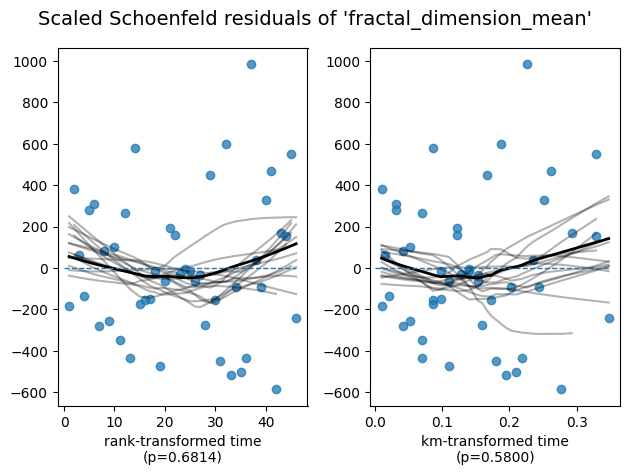

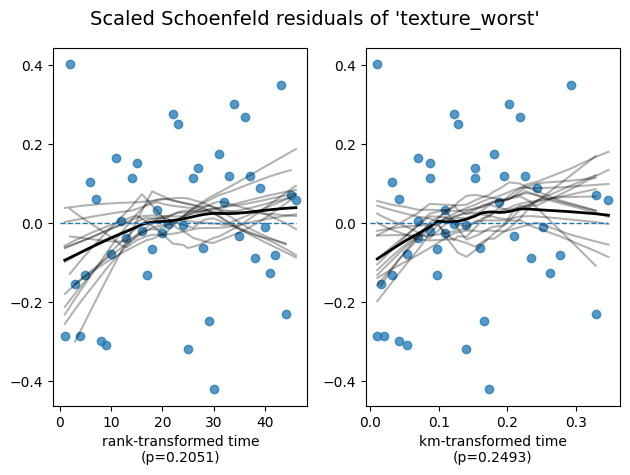

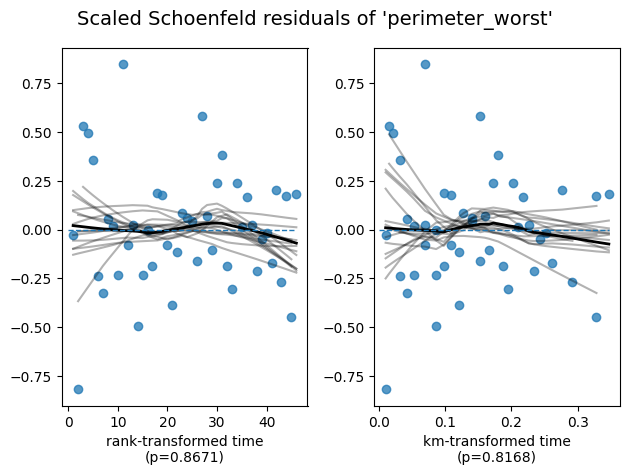

In [40]:
import pandas as pd
from lifelines import CoxPHFitter


# we define a function to calculate the c-index
def calculate_cindex(data, features):
    train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)
    cph = CoxPHFitter()
    cph.fit(train_data[features + ["Time", "event"]], duration_col="Time", event_col="event")
    test_pred = cph.predict_partial_hazard(test_data[features])
    return concordance_index(test_data["Time"], -test_pred, test_data["event"])

# Initializing the variables
all_features = list(data.columns)
all_features.remove("Time")
all_features.remove("event")
selected_features = []
remaining_features = all_features.copy()
best_cindex = 0

# Performing forward feature selection
while remaining_features:
    cindices = []
    for feature in remaining_features:
        current_features = selected_features + [feature]
        cindex = calculate_cindex(data, current_features)
        cindices.append((feature, cindex))
    
    # Selecting the best feature based on c-index
    best_feature, best_feature_cindex = max(cindices, key=lambda x: x[1])
    
    # Checking for improvement
    if best_feature_cindex > best_cindex:
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        best_cindex = best_feature_cindex
        print(f"Selected feature: {best_feature}, C-index: {best_cindex}")
    else:
        # if there is no improvement in the model stop
        break

print("Selected features:", selected_features)

# fitting the final model with selected features
cph = CoxPHFitter()
cph.fit(data[selected_features + ["Time", "event"]], duration_col="Time", event_col="event")
cph.print_summary(decimals=3)
cph.plot()
cph.check_assumptions(data[selected_features + ["Time", "event"]], p_value_threshold=0.05,show_plots=True)
plt.show()


In [35]:
# import pandas as pd
# from lifelines import CoxPHFitter
# from lifelines.utils import concordance_index
# from sklearn.model_selection import KFold

# # Assuming data is a pandas DataFrame and 'Time' and 'event' are your duration and event columns
# # data.head()

# # Define a function to perform k-Fold Cross-Validation
# def cross_validate_cph(data, features, duration_col, event_col, k=5):
#     kf = KFold(n_splits=k, shuffle=True, random_state=42)
#     cindex_scores = []

#     for train_index, test_index in kf.split(data):
#         train_data = data.iloc[train_index]
#         test_data = data.iloc[test_index]
        
#         cph = CoxPHFitter()
#         cph.fit(train_data[features + [duration_col, event_col]], duration_col=duration_col, event_col=event_col)
        
#         test_pred = cph.predict_partial_hazard(test_data[features])
#         cindex = concordance_index(test_data[duration_col], -test_pred, test_data[event_col])
#         cindex_scores.append(cindex)
    
#     mean_cindex = sum(cindex_scores) / len(cindex_scores)
#     return mean_cindex

# # Define your feature columns, duration column, and event column
# features = list(data.columns)
# features.remove("Time")
# features.remove("event")

# # Perform cross-validation
# mean_cindex = cross_validate_cph(data, features, duration_col="Time", event_col="event", k=5)
# print(f"Mean concordance index from 5-Fold Cross-Validation: {mean_cindex:.3f}")


<B>Proportional Hazards Assumption</b>